In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DRIVE_PATH = '/content/gdrive/My\ Drive/cds_rl_2022'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
    !mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cds_rl_2022'
if not os.path.exists(SYM_PATH):
    !ln -s $DRIVE_PATH $SYM_PATH

In [ ]:
!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        git-lfs \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg

# set up git lfs
!git lfs install

In [ ]:
%pip install free-mujoco-py

# Cythonizes pkg on the first run
import mujoco_py

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')

ATARI_PATH=f'{SYM_PATH}/Atari'

%pip install unrar
!unrar x Roms.rar
%mkdir $ATARI_PATH
%mv Roms.rar $ATARI_PATH
%mv 'HC ROMS' $ATARI_PATH
%mv 'ROMS' $ATARI_PATH
!python -m atari_py.import_roms $ATARI_PATH

In [ ]:
%cd $SYM_PATH
!git clone https://github.com/pkuderov/mipt-rl-hw-2022.git rl_hw
%cd rl_hw
%cd $SYM_PATH/rl_hw
# git commit before pulling
!git checkout -b "hw2"
!git add .
!git commit -m "HW2 solution"
!git checkout main

# update
!git pull
%cd hw1
%pip install -r requirements.colab.txt
%pip install -e .

# also install hw3 package
%cd ../hw3
%pip install -e .

## 1 эксперимент

In [ ]:
!python ./hw3/scripts/run_hw3_dqn.py --env_name MsPacman-v0 --exp_name q1

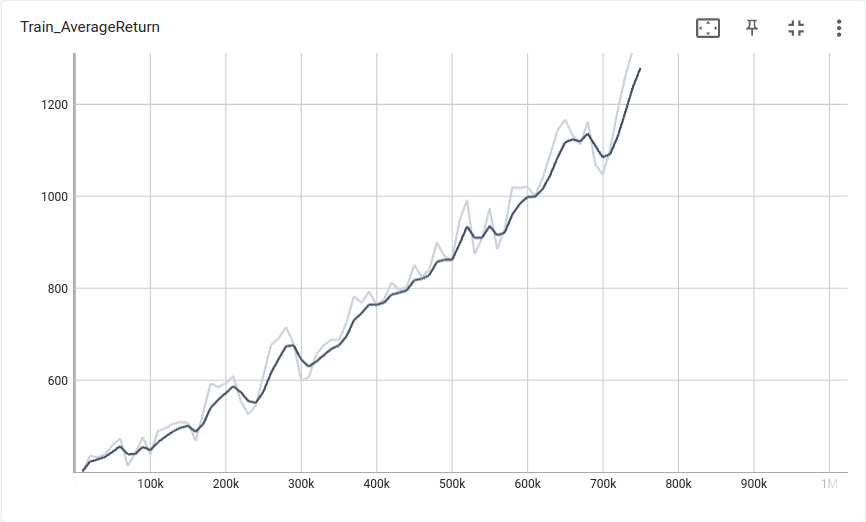

## 2 Эксперимент

In [ ]:
!python ./hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_1 --seed 1
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_1 --double_q --seed 1

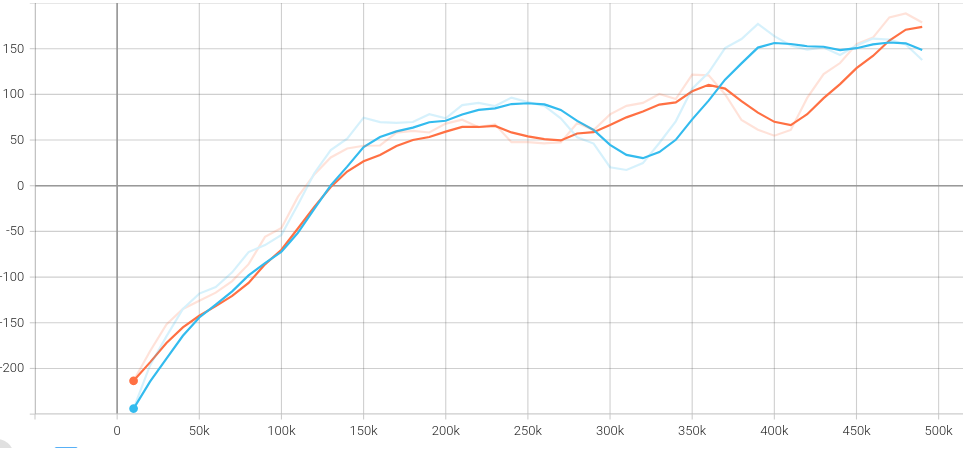

In [ ]:
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_2 --seed 2
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_2 --double_q --seed 2

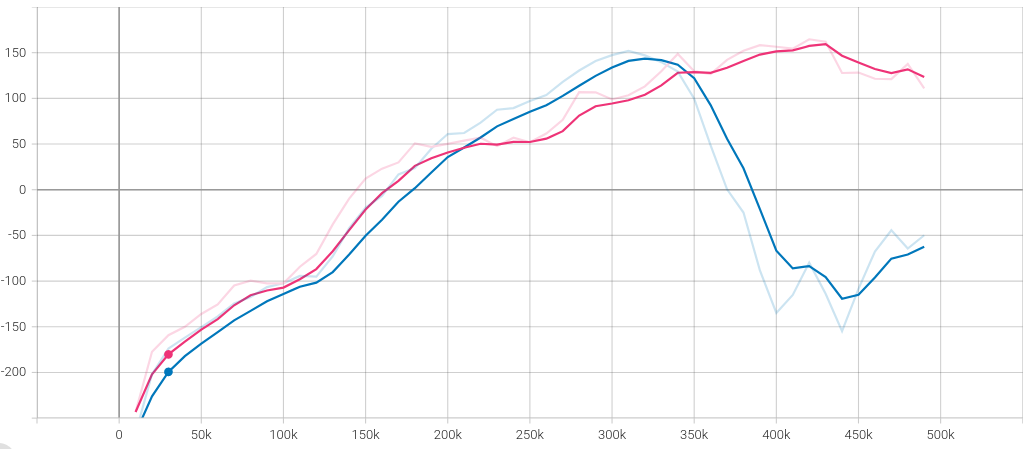

In [ ]:
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_3 --seed 3
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_3 --double_q --seed 3

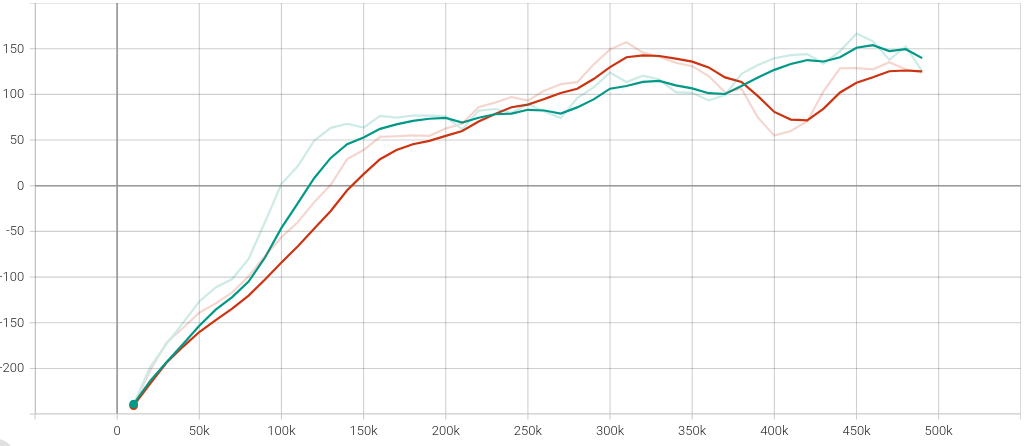

## 3 эксперимент
будем варьировать num_agent_train_steps_per_iter $\in$ [1, 10, 20]

In [ ]:
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --num_agent_train_steps_per_iter 1 --exp_name q3_1
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --num_agent_train_steps_per_iter 10 --exp_name q3_10
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --num_agent_train_steps_per_iter 20 --exp_name q3_20

Считается нереально долго, перейдем к batch_size $\in$ [16,32,64]

In [ ]:
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --batch_size 16 --double_q --exp_name q3_16
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --batch_size 32 --double_q --exp_name q3_32
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --batch_size 64 --double_q --exp_name q3_64

C увеличением получается быстрее достичь значений, близких к максимуму, но бс 32 показывает себя лучше на перспективе
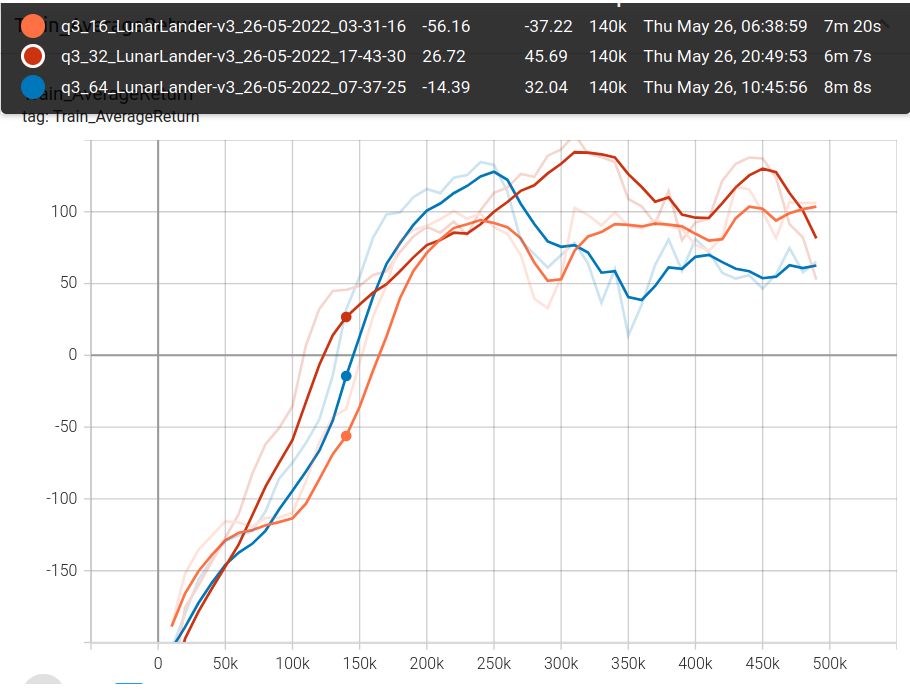


# 4 эксперимент

In [ ]:
!python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_ac_1_1 -ntu 1 -ngsptu 1

In [ ]:
!python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_100_1 -ntu 100 -ngsptu 1

In [ ]:
!python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_1_100 -ntu 1 -ngsptu 100

In [ ]:
!python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_10_10 -ntu 10 -ngsptu 10

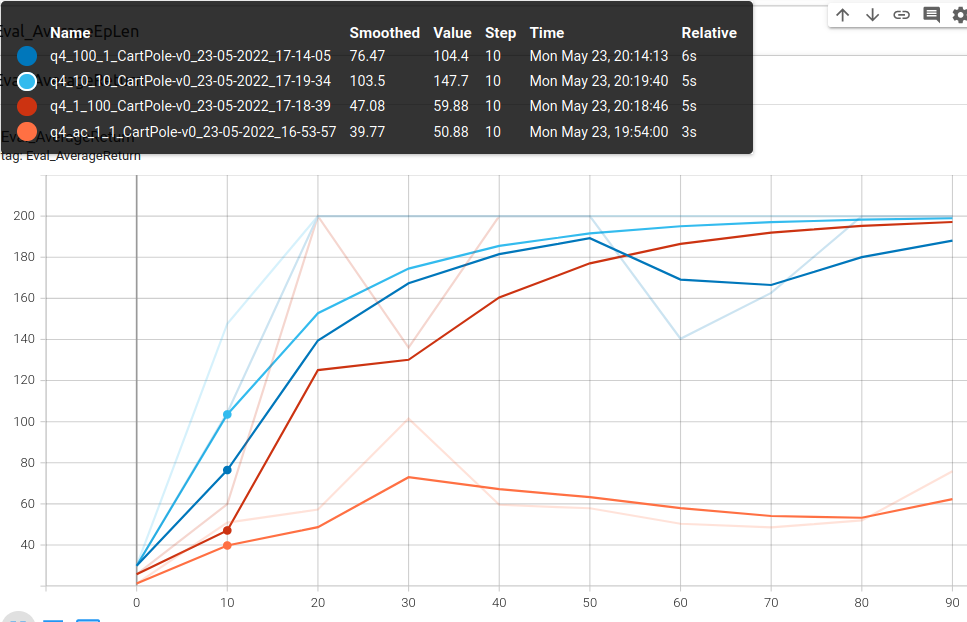

## 5 эксперимент

In [ ]:
!python hw3/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_10_10 -ntu 10 -ngsptu 10

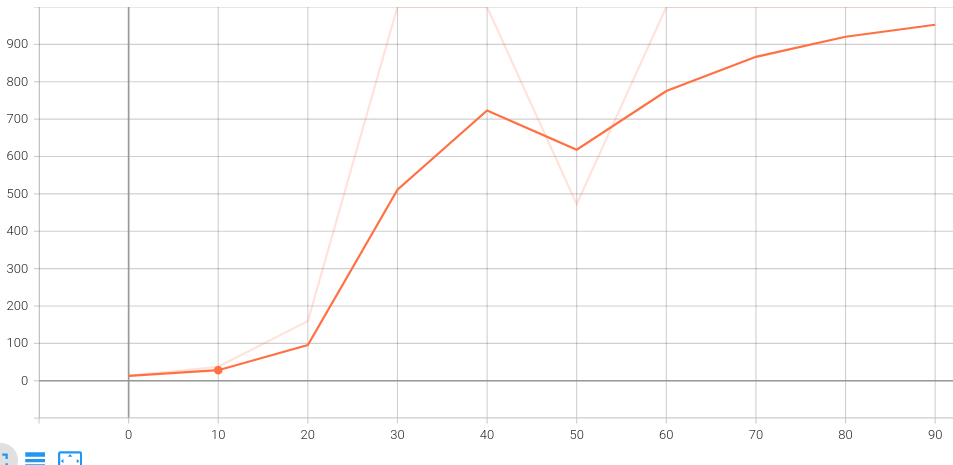

In [ ]:
!python hw3/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_10_10 -ntu 10 -ngsptu 10

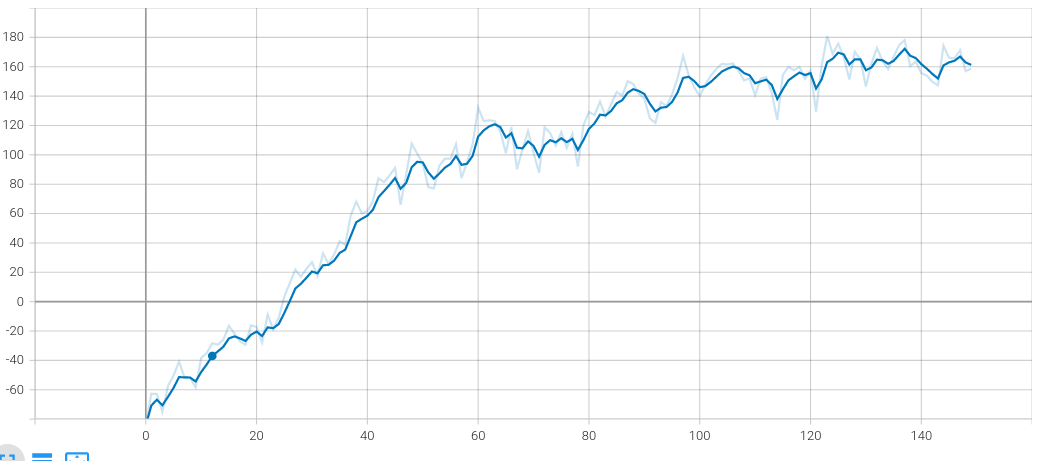

Кажется все в порядке

In [ ]:
!tar -cvf hw3.tar.gz ./